In [1]:
import Modules.SQcircuit_extensions as sq_ext
import Modules.figures as figs
import SQcircuit as sq
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import importlib

%matplotlib ipympl
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})
importlib.reload(sq_ext)
importlib.reload(sq)
importlib.reload(figs)
np.set_printoptions(linewidth=300, formatter={'float': '{:.12f}'.format})
# np.set_printoptions(linewidth=200, formatter={'float': '{:.1e}'.format})

In [2]:
nH = 1e-9
fF = 1e-15
GHz = 1e9

In [3]:
h    = 6.626e-34
GHz = 1e9
e0   = 1.602e-19
Φ_0 = h/(2*e0)

In [4]:
# Circuit parameters
C=10
CJ=6
Csh=10
Lq=25
Lr=10
Δ=0.1

EJ = 10
l = Lq*(Lq+4*Lr) - 4*Δ**2

In [5]:
Cf = C/2 + Csh + CJ
Lf = l/(Lq+4*Lr)

C_f = Cf * fF
L_f = Lf * nH
E_J = EJ * GHz

Lres = l/(Lq)
Cres = C/2
L_res = Lres * nH
C_res = Cres * fF

In [6]:
(2 * Δ / l)**-1

8124.799999999999

In [7]:
E_L_r = (Φ_0/(2*np.pi))**2/L_res / h
E_L_r / GHz

2.5153823766259946

In [8]:
E_C_r = e0**2 / (2*C_res) / h
E_C_r / GHz

3.8732327195894953

In [9]:
ω_r = 1/np.sqrt(L_res*C_res) / 2 / np.pi / GHz
ω_r

8.828436474677309

In [10]:
E_L_f = (Φ_0/(2*np.pi))**2/L_f / h/ GHz
E_L_f 

6.539994179227587

In [11]:
E_C_f = e0**2 / (2*C_f) / h / GHz
E_C_f 

0.9221982665689276

In [12]:
ω01_res_lim = 1/np.sqrt(C_f*L_f) /2/np.pi/GHz
ω01_res_lim

6.946176672359871

In [13]:
EJ_values = np.geomspace(1e-1,100,50)
ω01_vs_EJ = np.zeros(len(EJ_values))
ω12_vs_EJ = np.zeros(len(EJ_values))
ω01_cR_lim_vs_EJ = np.zeros(len(EJ_values))
ω12_cR_lim_vs_EJ = np.zeros(len(EJ_values))


for i, EJ in enumerate(EJ_values):
    V =  lambda φ: E_L_f*φ**2/2 - EJ*GHz*np.cos(φ+np.pi)
    φ_min = sp.optimize.minimize_scalar(V).x
    Φ_min= (Φ_0 / (2 * np.pi)) * φ_min / np.sqrt(sq.hbar) 
    
    fluxonium_vs_EJ = sq_ext.sq_fluxonium( EJ=EJ , C_F_eff=Cf, L_F_eff=Lf)  
    fluxonium_vs_EJ.diag(3) 
    ω01_vs_EJ[i] = fluxonium_vs_EJ.efreqs[1]-fluxonium_vs_EJ.efreqs[0]
    ω12_vs_EJ[i] = fluxonium_vs_EJ.efreqs[2]-fluxonium_vs_EJ.efreqs[1]
    L_f_CR = (Φ_0/2/np.pi)**2 / (EJ*GHz * h)
    ω12_cR_lim_vs_EJ[i]  = 1/np.sqrt(C_f*L_f_CR) /2/np.pi/GHz

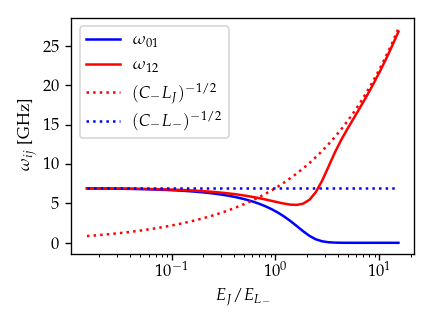

In [14]:
fig, ax = plt.subplots(figsize=np.array([4,3])*0.9, dpi=120)
ax.plot(EJ_values/E_L_f, ω01_vs_EJ, 'b', label=r'$\omega_{01}$')
ax.plot(EJ_values/E_L_f, ω12_vs_EJ, 'r', label=r'$\omega_{12}$')
ax.plot(EJ_values/E_L_f, ω12_cR_lim_vs_EJ, ':r', label=r'$(C_-L_J)^{-1/2}$')
ax.plot(EJ_values/E_L_f, ω01_res_lim*np.ones(len(EJ_values)), ':b', label=r'$(C_-L_-)^{-1/2}$')
# ax.plot(EJ_values, ω01_cR_lim_vs_EJ, ':k')

ax.set_xscale('log')
ax.legend()
ax.set_xlabel('$E_J/E_{L_-}$')
ax.set_ylabel('$\omega_{ij}$ [GHz]')
fig.tight_layout()
fig.show()
figs.export('fluxonium_gap_analytical_vs_numerical.pdf', fig)

plt.close('all')

In [135]:
EJ_values = np.geomspace(1,15,20)
C_F_eff_values = np.linspace(6.5, 21, 20)
L_F_eff_values = np.linspace(10, 50, 3)
L_R_eff_values = [30, 50, 70]

ω01_vs_EJ_vs_EC = np.zeros([len(EJ_values), len(C_F_eff_values), len(C_F_eff_values) ])
ω12_vs_EJ_vs_EC = np.zeros([len(EJ_values), len(C_F_eff_values), len(C_F_eff_values) ])
EC_values = np.zeros(len(C_F_eff_values))
EL_values = np.zeros(len(L_F_eff_values))
ER_values = np.zeros(len(L_F_eff_values))

ω01_q_vs_EJ_vs_EC = np.zeros([len(EJ_values), len(C_F_eff_values), len(C_F_eff_values) ])
ω12_q_vs_EJ_vs_EC = np.zeros([len(EJ_values), len(C_F_eff_values), len(C_F_eff_values) ])

for i, EJ in enumerate(EJ_values):
    for j, C_F_eff in enumerate(C_F_eff_values):
        if i ==0:
            EC_values[j] = e0**2 / (2*C_F_eff*fF) / h / GHz
        for k, L_F_eff in enumerate(L_F_eff_values):
            if j==i==0:
                EL_values[k] = (Φ_0/(2*np.pi))**2/(L_F_eff*nH) / h/ GHz
                ER_values[k] = (Φ_0/(2*np.pi))**2/(L_R_eff_values[k]*nH) / h/ GHz
            fluxonium = sq_ext.sq_fluxonium(EJ=EJ, C_F_eff=C_F_eff, L_F_eff=L_F_eff)  
            fluxonium.diag(3) 
            ω01_vs_EJ_vs_EC[i,j,k] = fluxonium.efreqs[1]-fluxonium.efreqs[0]
            ω12_vs_EJ_vs_EC[i,j,k] = fluxonium.efreqs[2]-fluxonium.efreqs[1]
            
            resonator = sq_ext.sq_resonator(L_R_eff=L_R_eff_values[k])
            E_q = sq_ext.diag(sq_ext.hamiltonian_qubit(fluxonium=fluxonium, resonator=resonator))[0]
            ω01_q_vs_EJ_vs_EC[i,j,k] = E_q[1]-E_q[0]
            ω12_q_vs_EJ_vs_EC[i,j,k] = E_q[2]-E_q[1]
    

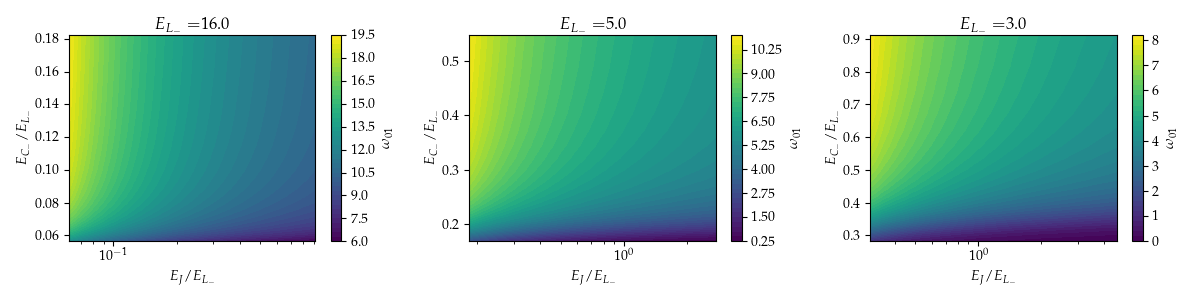

In [136]:
fig, axs = plt.subplots(ncols=3, figsize = [12,3])
for i, (ax, E_L_F_eff) in enumerate(zip(axs, EL_values)):
    contour_plot = ax.contourf(EJ_values/E_L_F_eff, EC_values/E_L_F_eff, ω01_vs_EJ_vs_EC[:,:,i], levels=50, cmap='viridis') 
    cb = fig.colorbar(contour_plot, label=r'$\omega_{01}$')
    ax.set_title(r'$E_{L_-}=$' + f'{np.round(E_L_F_eff)}' )
    ax.set_xscale('log')
    ax.set_xlabel('$E_J/E_{L_-}$')
    ax.set_ylabel('$E_{C_-}/E_{L_-}$')
    # ax.set_yscale('log')
fig.tight_layout()
fig.show()
plt.close('all')
# figs.export('qubit_mode_vs_Cc_alpha.pdf', fig)

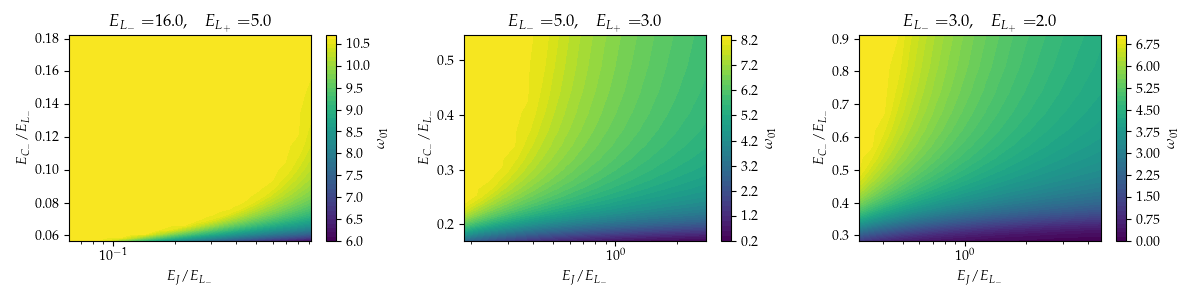

In [148]:
fig, axs = plt.subplots(ncols=3, figsize = [12,3])
for i, (ax, E_L_F_eff) in enumerate(zip(axs, EL_values)):
    contour_plot = ax.contourf(EJ_values/E_L_F_eff, EC_values/E_L_F_eff, ω01_q_vs_EJ_vs_EC[:,:,i], levels=50, cmap='viridis') 
    cb = fig.colorbar(contour_plot, label=r'$\omega_{01}$')
    ax.set_title(r'$E_{L_-}=$' + f'{np.round(E_L_F_eff)},' + r'$\quad E_{L_+}=$' + f'{np.round(ER_values[i])}'  )
    ax.set_xscale('log')
    ax.set_xlabel('$E_J/E_{L_-}$')
    ax.set_ylabel('$E_{C_-}/E_{L_-}$')
fig.tight_layout()
fig.show()
plt.close('all')
# figs.export('qubit_mode_vs_Cc_alpha.pdf', fig)

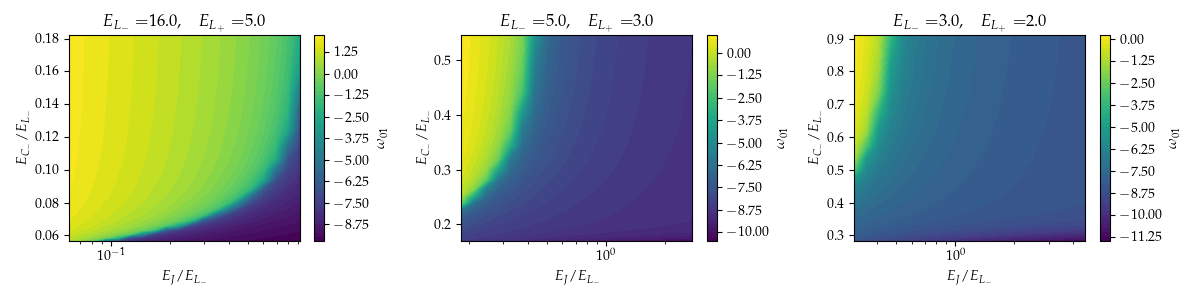

In [147]:
fig, axs = plt.subplots(ncols=3, figsize = [12,3])
for i, (ax, E_L_F_eff) in enumerate(zip(axs, EL_values)):
    contour_plot = ax.contourf(EJ_values/E_L_F_eff, EC_values/E_L_F_eff, np.log(np.abs(ω01_q_vs_EJ_vs_EC[:,:,i]-ω01_vs_EJ_vs_EC[:,:,i])), levels=50, cmap='viridis') 
    cb = fig.colorbar(contour_plot, label=r'$\omega_{01}$')
    ax.set_title(r'$E_{L_-}=$' + f'{np.round(E_L_F_eff)},' + r'$\quad  E_{L_+}=$' + f'{np.round(ER_values[i])}'  )
    ax.set_xscale('log')
    ax.set_xlabel('$E_J/E_{L_-}$')
    ax.set_ylabel('$E_{C_-}/E_{L_-}$')
fig.tight_layout()
fig.show()
plt.close('all')
# figs.export('qubit_mode_vs_Cc_alpha.pdf', fig)

In [33]:
EJ_values = np.geomspace(1,15,10)
C_F_eff_values = np.linspace(6.5, 21, 10)
L_F_eff_values = np.linspace(10, 50, 10)

ω01_vs_EJ = np.zeros([len(EJ_values), len(C_F_eff_values), len(L_F_eff_values)])
ω12_vs_EJ = np.zeros([len(EJ_values), len(C_F_eff_values), len(L_F_eff_values)])
# ω01_cR_lim_vs_EJ = np.zeros(len(EJ_values))
# ω12_cR_lim_vs_EJ = np.zeros(len(EJ_values))

for i, EJ in enumerate(EJ_values):
    for j, C_F_eff in enumerate(C_F_eff_values):
        for k, L_F_eff in enumerate(L_F_eff_values):
            fluxonium = sq_ext.sq_fluxonium(EJ=EJ, C_F_eff=C_F_eff, L_F_eff=L_F_eff)  
            fluxonium.diag(3) 
            ω01_vs_EJ[i,j,k] = fluxonium.efreqs[1]-fluxonium.efreqs[0]
            ω12_vs_EJ[i,j,k] = fluxonium.efreqs[2]-fluxonium.efreqs[1]
    

In [35]:
ω01_vs_EJ.min()

0.043515278113771094

In [ ]:

# Creating dataset
z = EJ_values
x = C_F_eff_values
y = L_F_eff_values
# Generate grid of points
X, Y, Z = np.meshgrid(x, y, z, indexing='ij')
X = X.flatten()
Y = Y.flatten()
Z = Z.flatten()

c = ω01_vs_EJ
norm = plt.Normalize(c.min(), c.max())
colors = plt.cm.viridis(norm(c)) 
 # Create the plot
fig, [ax1, ax2, ax3] = plt.subplots(ncols=3, figsize=[12,3], dpi=200)
ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

# Scatter plot
scatter = ax1.scatter(X, Y, Z, c=c, marker='o', alpha=0.5)
scatter = ax2.scatter(X, Y, Z, c=c, marker='o', alpha=0.5)
scatter = ax3.scatter(X, Y, Z, c=c, marker='o', alpha=0.5)

# Add a color bar which maps values to colors.
cbar = fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap='viridis'), ax=ax3, label='Value')
ax2.view_init(azim=-120, elev=-400) 
ax3.view_init(elev=10, azim=0) 
fig.tight_layout()
# Set labels and title
# ax.set_xlabel('X Axis')
# ax.set_ylabel('Y Axis')
# ax.set_zlabel('Z Axis')
# plt.title('3D Scatter Plot with Colors for Each Combination of (x, y, z)')
plt.show()

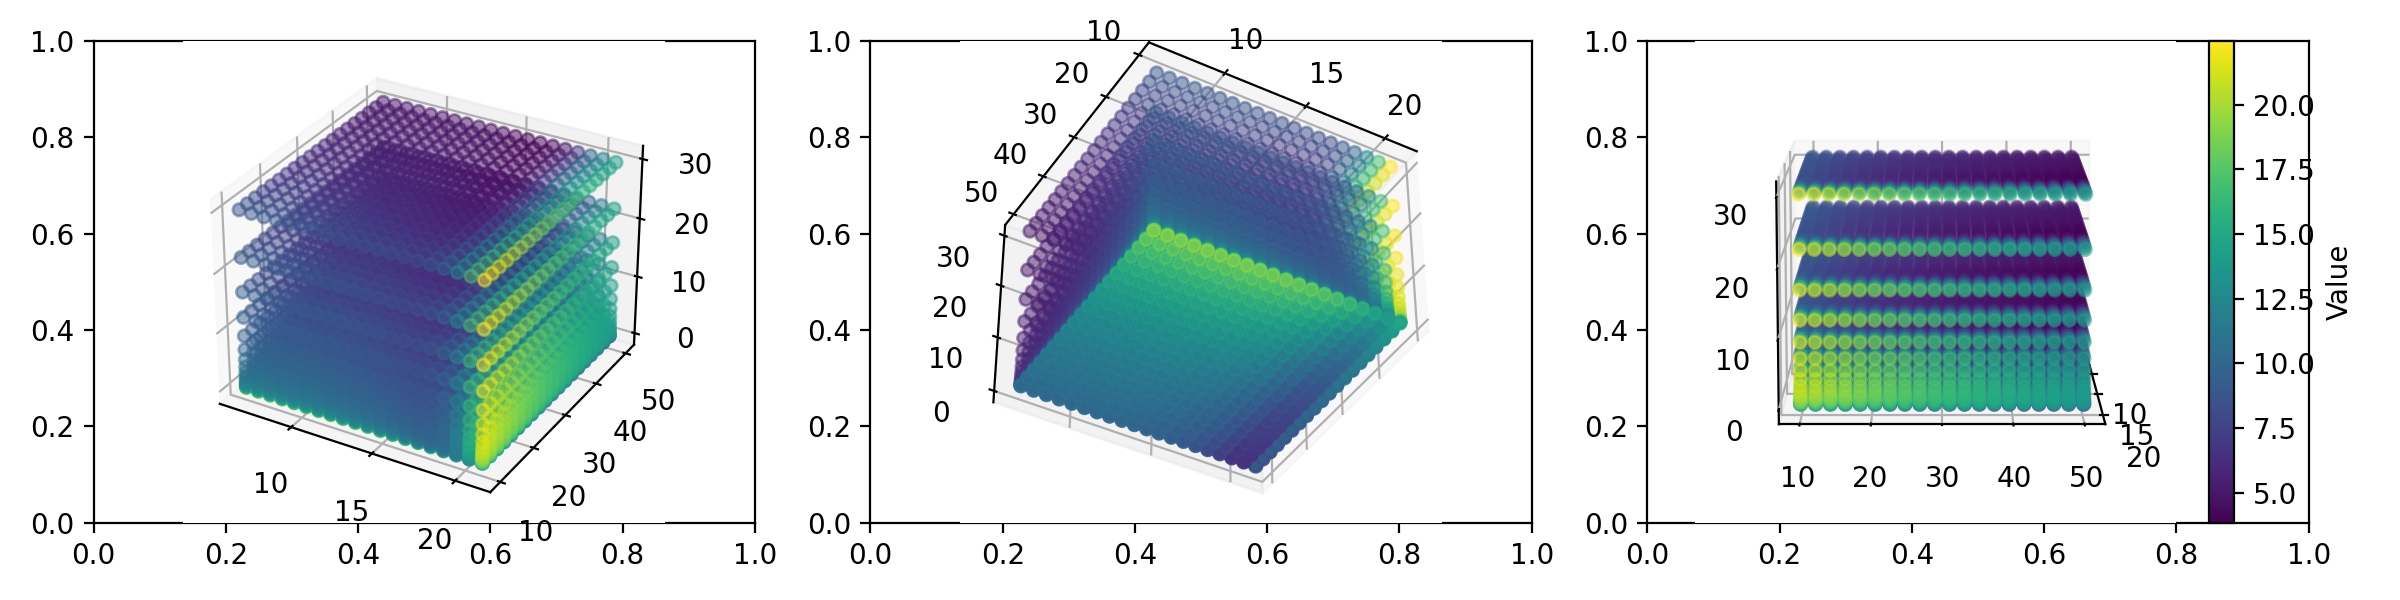

In [41]:
# Import libraries
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
 
 
# Creating dataset
z = EJ_values
x = C_F_eff_values
y = L_F_eff_values
# Generate grid of points
X, Y, Z = np.meshgrid(x, y, z, indexing='ij')
X = X.flatten()
Y = Y.flatten()
Z = Z.flatten()

c = ω12_vs_EJ
norm = plt.Normalize(c.min(), c.max())
colors = plt.cm.viridis(norm(c)) 
 # Create the plot
fig, [ax1, ax2, ax3] = plt.subplots(ncols=3, figsize=[12,3], dpi=200)
ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

# Scatter plot
scatter = ax1.scatter(X, Y, Z, c=c, marker='o', alpha=0.5)
scatter = ax2.scatter(X, Y, Z, c=c, marker='o', alpha=0.5)
scatter = ax3.scatter(X, Y, Z, c=c, marker='o', alpha=0.5)

# Add a color bar which maps values to colors.
cbar = fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap='viridis'), ax=ax3, label='Value')
ax2.view_init(azim=-120, elev=-400) 
ax3.view_init(elev=10, azim=0) 
fig.tight_layout()
# Set labels and title
# ax.set_xlabel('X Axis')
# ax.set_ylabel('Y Axis')
# ax.set_zlabel('Z Axis')
# plt.title('3D Scatter Plot with Colors for Each Combination of (x, y, z)')
plt.show()